# 第2章　化合物の表記方法

## 2. 1 化合物構造の表現方法

RDKitのインストール

In [ ]:
pip install rdkit

### 2. 1. 1 SMILES表記

In [ ]:
import rdkit
from rdkit import Chem

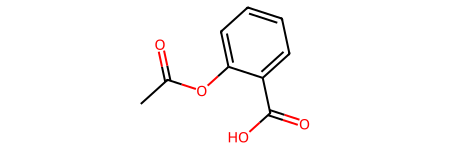

In [ ]:
smi = "CC(=O)Oc1ccccc1C(=O)O"

mol = Chem.MolFromSmiles(smi)
mol

### 2. 1. 2 InChI表記

In [ ]:
inchi = Chem.MolToInchi(mol)
inchi

'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)'

### 2. 1. 3 MOL表記

In [ ]:
mb = Chem.MolToMolBlock(mol)
print(mb)


     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
    5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    3.8971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0

### 2. 1. 4 複数化合物の表記方法

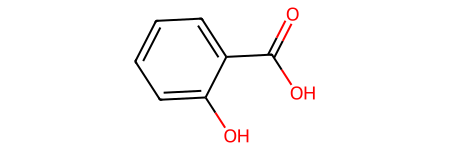

In [ ]:
smi2 = "Oc1ccccc1C(=O)O"
mol2 = Chem.MolFromSmiles(smi2)
mol2

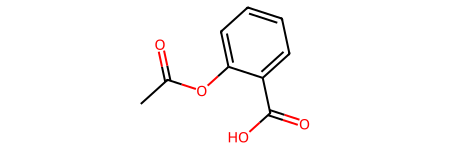

In [ ]:
mols = [mol, mol2]
mols[0]

複数化合物の同時表示

In [ ]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

## 1-5. データの保存と読み込み

Google Driveのマウント

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Cheminformatics")
print(os.getcwd())

/content/drive/MyDrive/Cheminformatics


SMILESとして保存

In [ ]:
f = open("mols.smi", "w")
for m in mols:
  f.write(Chem.MolToSmiles(m))
f.close()

SDFとして保存

In [ ]:
f = Chem.SDWriter("mols.sdf")
for m in mols:
  f.write(m)
f.close()

SDFの読み込み

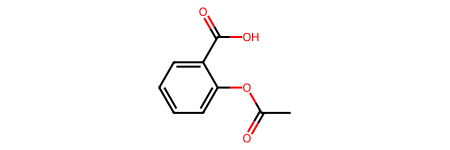

In [ ]:
suppl = Chem.SDMolSupplier("mols.sdf")
suppl[0]

## 2. 2 化合物の記述子情報

### 2. 2. 1 フィンガープリントの概要

numpy と pandas のインポート

In [ ]:
import numpy as np
import pandas as pd

### 2. 2. 1 (1) RDKit Fingerprint

In [ ]:
from rdkit.Chem import AllChem

fpgen_rdkit = AllChem.GetRDKitFPGenerator(maxPath=2, fpSize=1024)
fps_rdkit = [fpgen_rdkit.GetFingerprint(m) for m in mols]

fps_array_rdkit = np.asarray(fps_rdkit)
pd.DataFrame(fps_array_rdkit)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. 2. 2 (2) Atom Pairフィンガープリント

In [ ]:
fpgen_pairs = AllChem.GetAtomPairGenerator()
fps_pairs = [fpgen_pairs.GetFingerprint(m) for m in mols]

fps_array_pairs = np.asarray(fps_pairs)
pd.DataFrame(fps_array_pairs)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. 2. 2 (3) MACCS keys

In [ ]:
from rdkit.Chem import MACCSkeys
fps_maccs = [MACCSkeys.GenMACCSKeys(m) for m in mols]

fps_array_maccs = np.asarray(fps_maccs)
pd.DataFrame(fps_array_maccs)

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0


### 2. 2. 2 (4) Morganフィンガープリント

In [ ]:
from rdkit.Chem import rdFingerprintGenerator

mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
fps_morgan = [mfpgen.GetFingerprint(m) for m in mols]

fps_array_morgan = np.asarray(fps_morgan)
pd.DataFrame(fps_array_morgan)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


部分構造の可視化

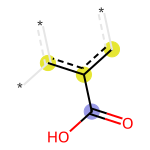

In [ ]:
from rdkit.Chem import Draw

ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap()

mfpgen.GetFingerprint(mols[0], additionalOutput=ao)
bi = ao.GetBitInfoMap()
Draw.DrawMorganBit(mols[0], 23, bi)

## 2. 3 物理化学的な特性

In [ ]:
from rdkit.Chem import Descriptors
descs = Descriptors.descList

descriptor_names = [d[0] for d in descs]
print(len(descriptor_names))
print(descriptor_names[5:10])

217
['SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons']


In [ ]:
print(f"分子量: {Descriptors.MolWt(mols[0]):.4}")
print(f"LogP: {Descriptors.MolLogP(mols[0]):.4}")

分子量: 180.2
LogP: 1.31


In [ ]:
Descriptors.CalcMolDescriptors(mols[0])

{'MaxAbsEStateIndex': 10.611948223733938,
 'MaxEStateIndex': 10.611948223733938,
 'MinAbsEStateIndex': 0.01601851851851821,
 'MinEStateIndex': -1.1140277777777776,
 'qed': 0.5501217966938848,
 'SPS': 9.307692307692308,
 'MolWt': 180.15899999999996,
 'HeavyAtomMolWt': 172.09499999999997,
 'ExactMolWt': 180.042258736,
 'NumValenceElectrons': 68,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.33900378687731025,
 'MinPartialCharge': -0.4775395271554559,
 'MaxAbsPartialCharge': 0.4775395271554559,
 'MinAbsPartialCharge': 0.33900378687731025,
 'FpDensityMorgan1': 1.3076923076923077,
 'FpDensityMorgan2': 1.9230769230769231,
 'FpDensityMorgan3': 2.4615384615384617,
 'BCUT2D_MWHI': 16.53611122125433,
 'BCUT2D_MWLOW': 10.182282381035343,
 'BCUT2D_CHGHI': 2.104306980957856,
 'BCUT2D_CHGLO': -2.0311320919470135,
 'BCUT2D_LOGPHI': 2.1698345568128055,
 'BCUT2D_LOGPLOW': -2.063000061964296,
 'BCUT2D_MRHI': 5.913065796110142,
 'BCUT2D_MRLOW': -0.13141434244030561,
 'AvgIpc': 2.0325369160995868,
 'B

データフレームとして表示

In [ ]:
descs = [Descriptors.CalcMolDescriptors(m) for m in mols]

df_descs = pd.DataFrame(descs, columns=descriptor_names)
df_descs

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.611948,10.611948,0.016019,-1.114028,0.550122,9.307692,180.159,172.095,180.042259,68,...,0,0,0,0,0,0,0,0,0,0
1,10.261759,10.261759,0.067130,-1.112870,0.610259,9.200000,138.122,132.074,138.031694,52,...,0,0,0,0,0,0,0,0,0,0
